<IPython.core.display.Javascript object>


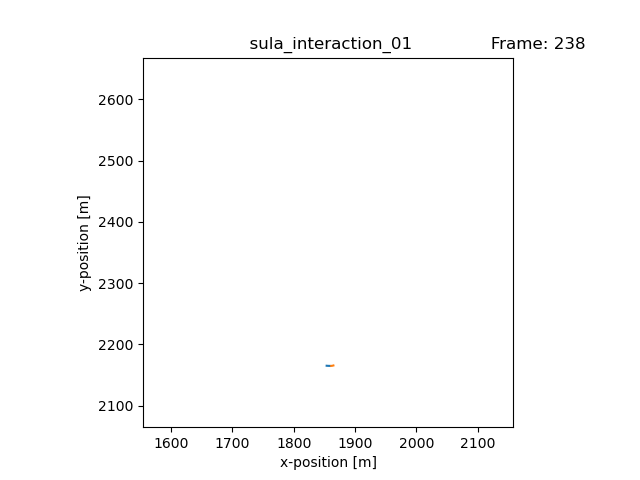

<IPython.core.display.Javascript object>


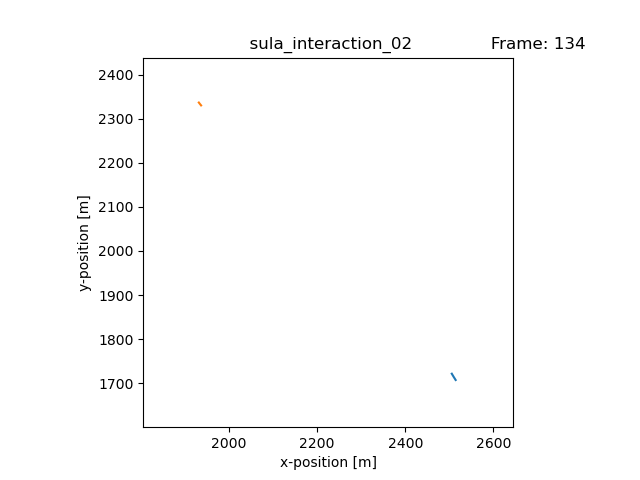

<IPython.core.display.Javascript object>


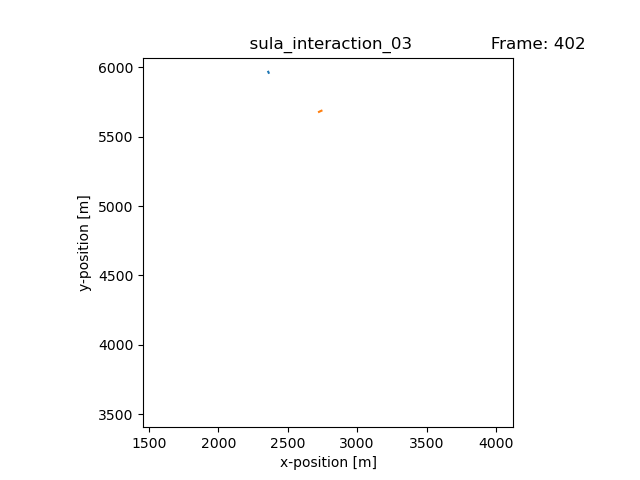

<IPython.core.display.Javascript object>


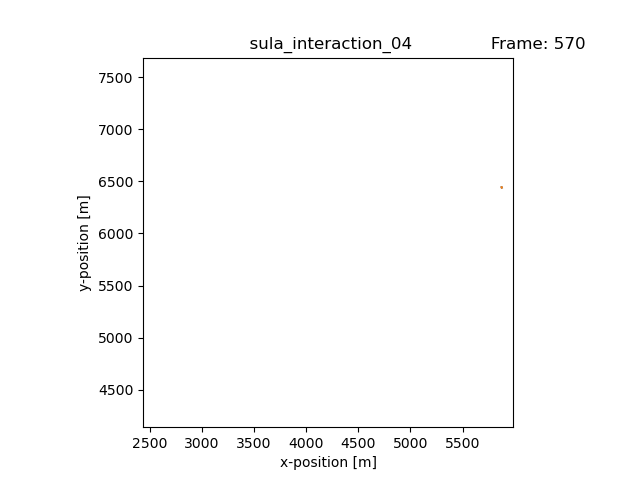

<IPython.core.display.Javascript object>


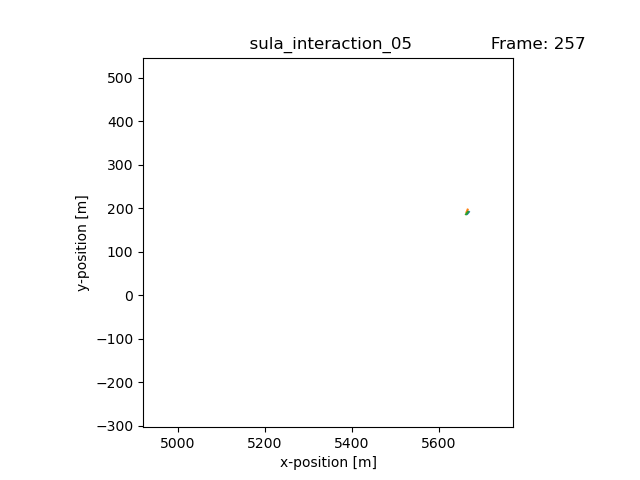

<IPython.core.display.Javascript object>


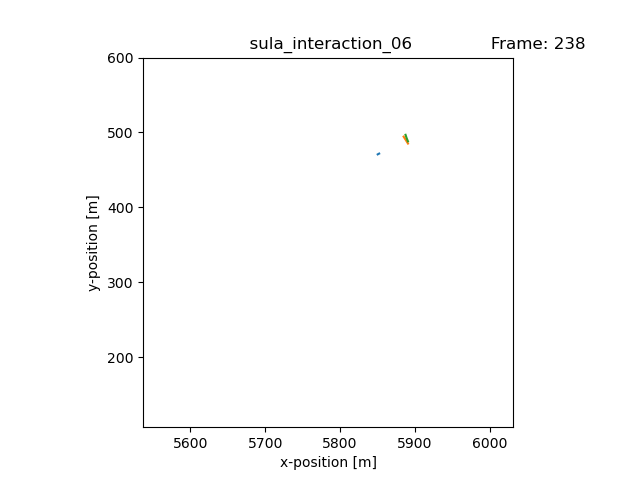

<IPython.core.display.Javascript object>


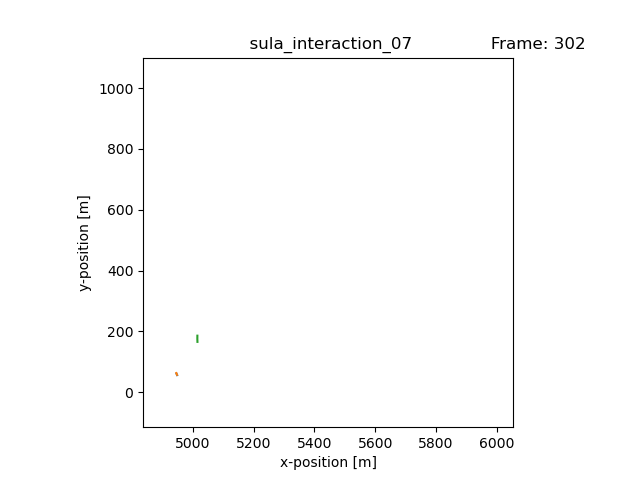

<IPython.core.display.Javascript object>


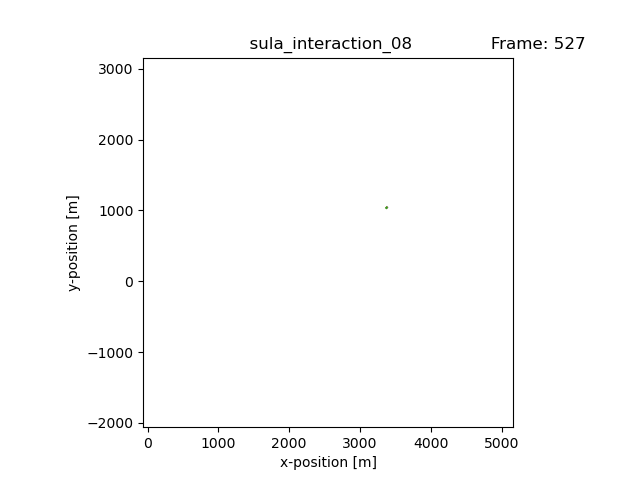

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


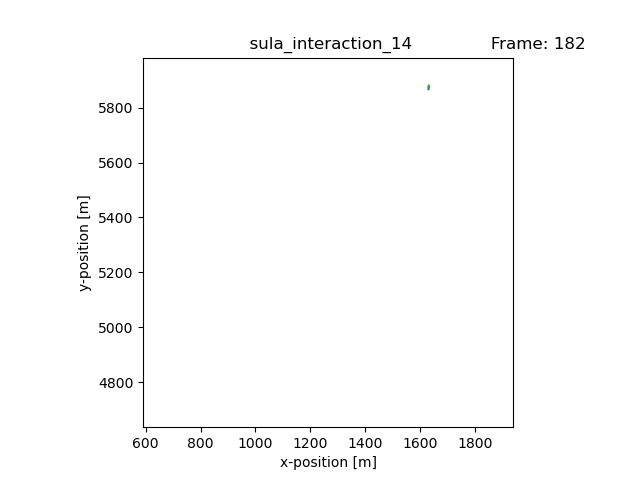

<IPython.core.display.Javascript object>


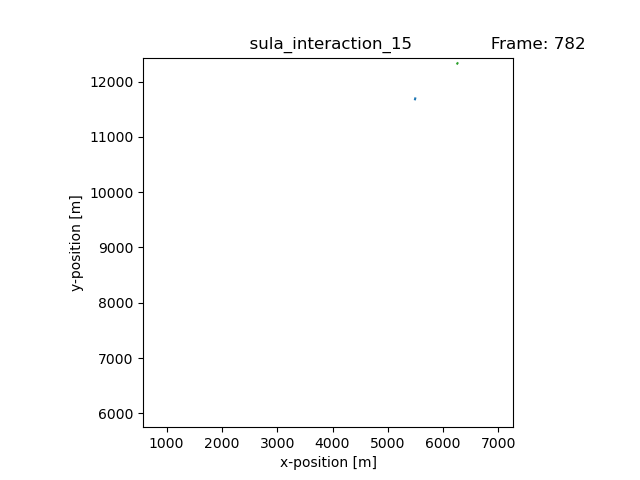

<IPython.core.display.Javascript object>


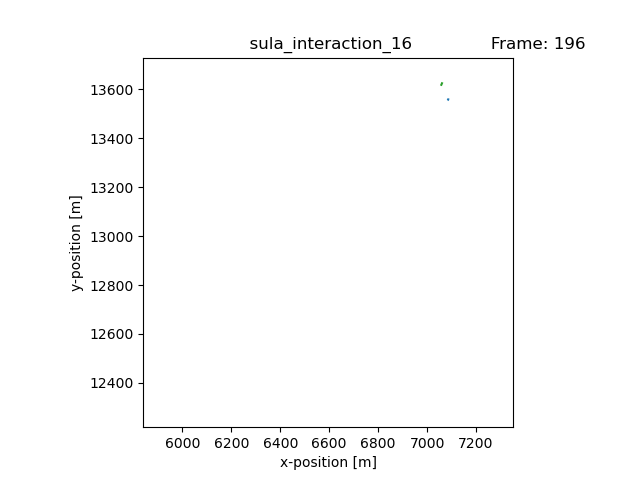

<IPython.core.display.Javascript object>


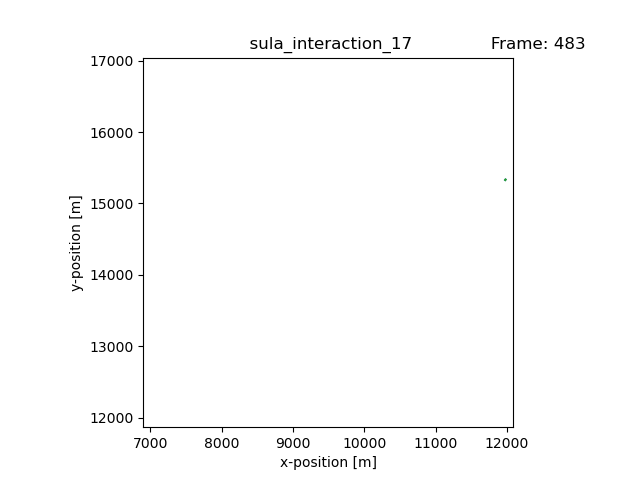

<IPython.core.display.Javascript object>


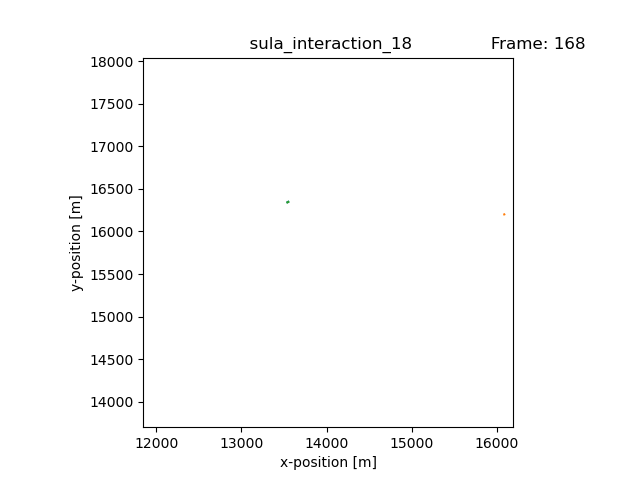

<IPython.core.display.Javascript object>


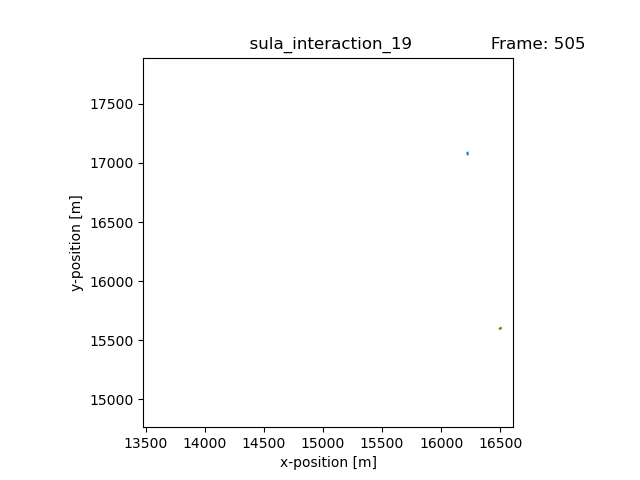

<IPython.core.display.Javascript object>


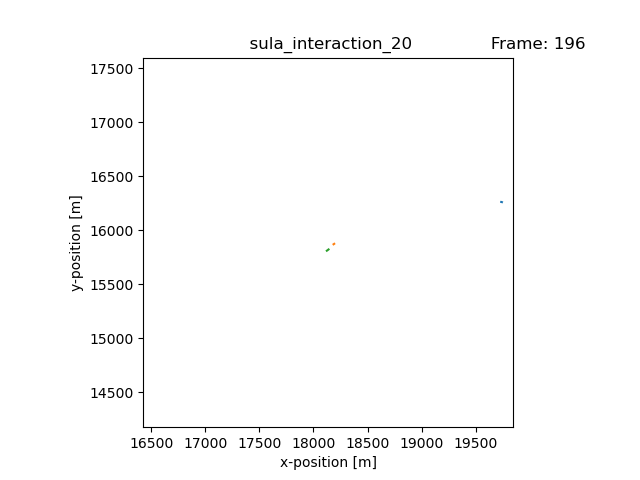

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


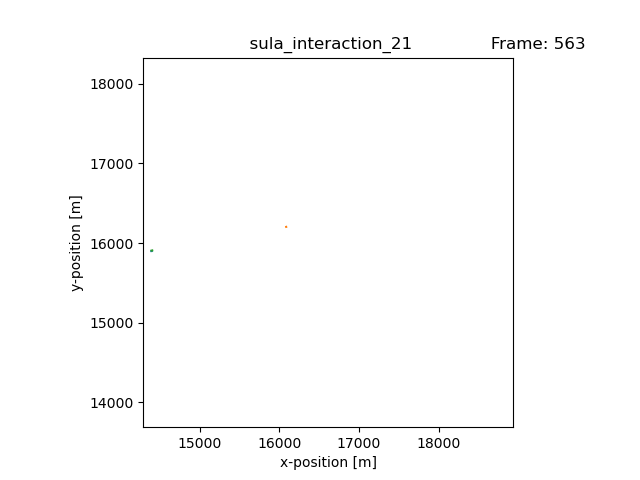

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


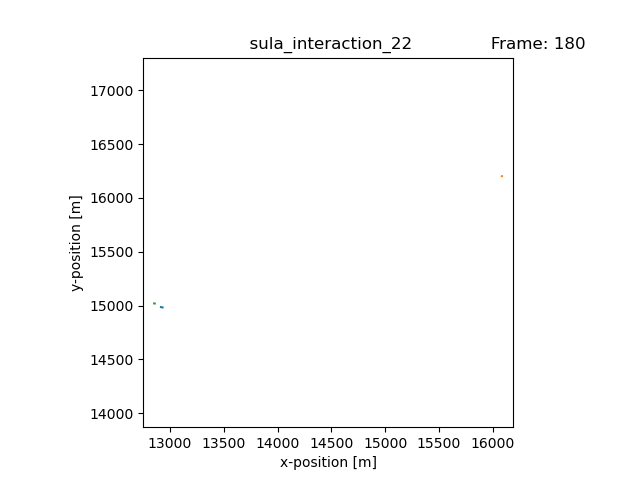

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


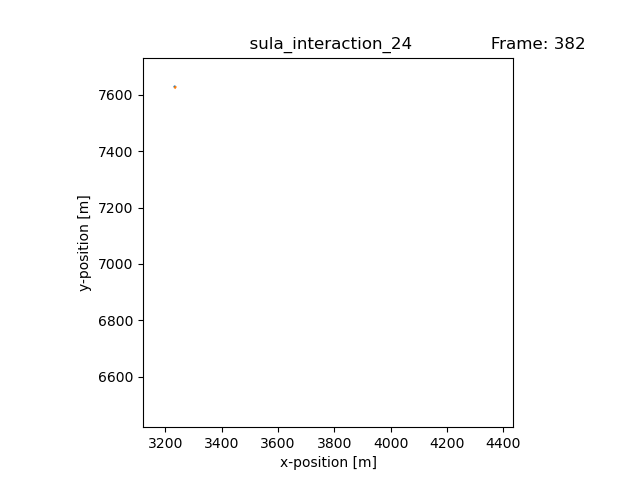

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


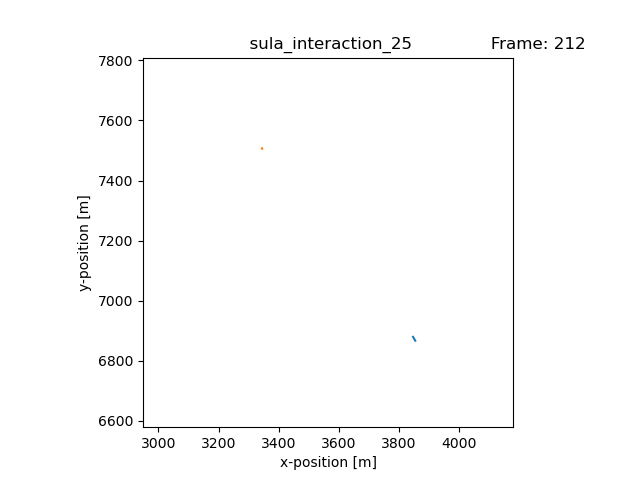

In [12]:
%matplotlib notebook
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


data = np.load('../npy/sula_data_interaction.npy', allow_pickle=True)


for number in range(1, 26):
    data_number = number - 1

    px1 = data[data_number][0][2]
    py1 = data[data_number][0][3]
    px2 = data[data_number][1][2]
    py2 = data[data_number][1][3]
    
    if len(data[data_number]) == 3:
        px3 = data[data_number][2][2]
        py3 = data[data_number][2][3]

    x_min = np.min([np.min(px1), np.min(px2)])
    x_max = np.max([np.max(px1), np.max(px2)])
    y_min = np.min([np.min(py1), np.min(py2)])
    y_max = np.max([np.max(py1), np.max(py2)])

    if len(data[data_number]) == 3:
        x_min = np.min([np.min(px1), np.min(px2), np.min(px3)])
        x_max = np.max([np.max(px1), np.max(px2), np.max(px3)])
        y_min = np.min([np.min(py1), np.min(py2), np.min(py3)])
        y_max = np.max([np.max(py1), np.max(py2), np.max(py3)])
    
    # focus on the interaction between 1 and 3 because 2 is far away
    if number >= 11 and number <= 17:
        x_min = np.min([np.min(px1), np.min(px3)])
        x_max = np.max([np.max(px1), np.max(px3)])
        y_min = np.min([np.min(py1), np.min(py3)])
        y_max = np.max([np.max(py1), np.max(py3)])

    range_max = np.array([x_max - x_min, y_max - y_min]).max() * 0.5
    x_mid = (x_max + x_min) * 0.5
    y_mid = (y_max + y_min) * 0.5


    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    margin = 100
    time_width = 3

    def update_func(i):

        ax.clear()

        ax.plot(px1[i-time_width:i], py1[i-time_width:i])
        ax.plot(px2[i-time_width:i], py2[i-time_width:i])

        if len(data[data_number]) == 3:
            ax.plot(px3[i-time_width:i], py3[i-time_width:i])

        ax.set_xlim(x_mid - range_max - margin, x_mid + range_max + margin)
        ax.set_ylim(y_mid - range_max - margin, y_mid + range_max + margin)
        ax.set_xlabel("x-position [m]")
        ax.set_ylabel("y-position [m]")

        number_frame = i
        ax.set_title('                                  sula_interaction_' +  "%02d" % number + '               Frame: ' + "%03d" % number_frame )


    # save movie
    ani = animation.FuncAnimation(fig, update_func, frames=len(px1), interval=100, repeat=True)
    name = 'sula_interaction_' +  "%02d" % number + '.mp4'
    filename = '../video/sula/' + name
    ani.save(filename, writer="ffmpeg")
    plt.show()



<IPython.core.display.Javascript object>


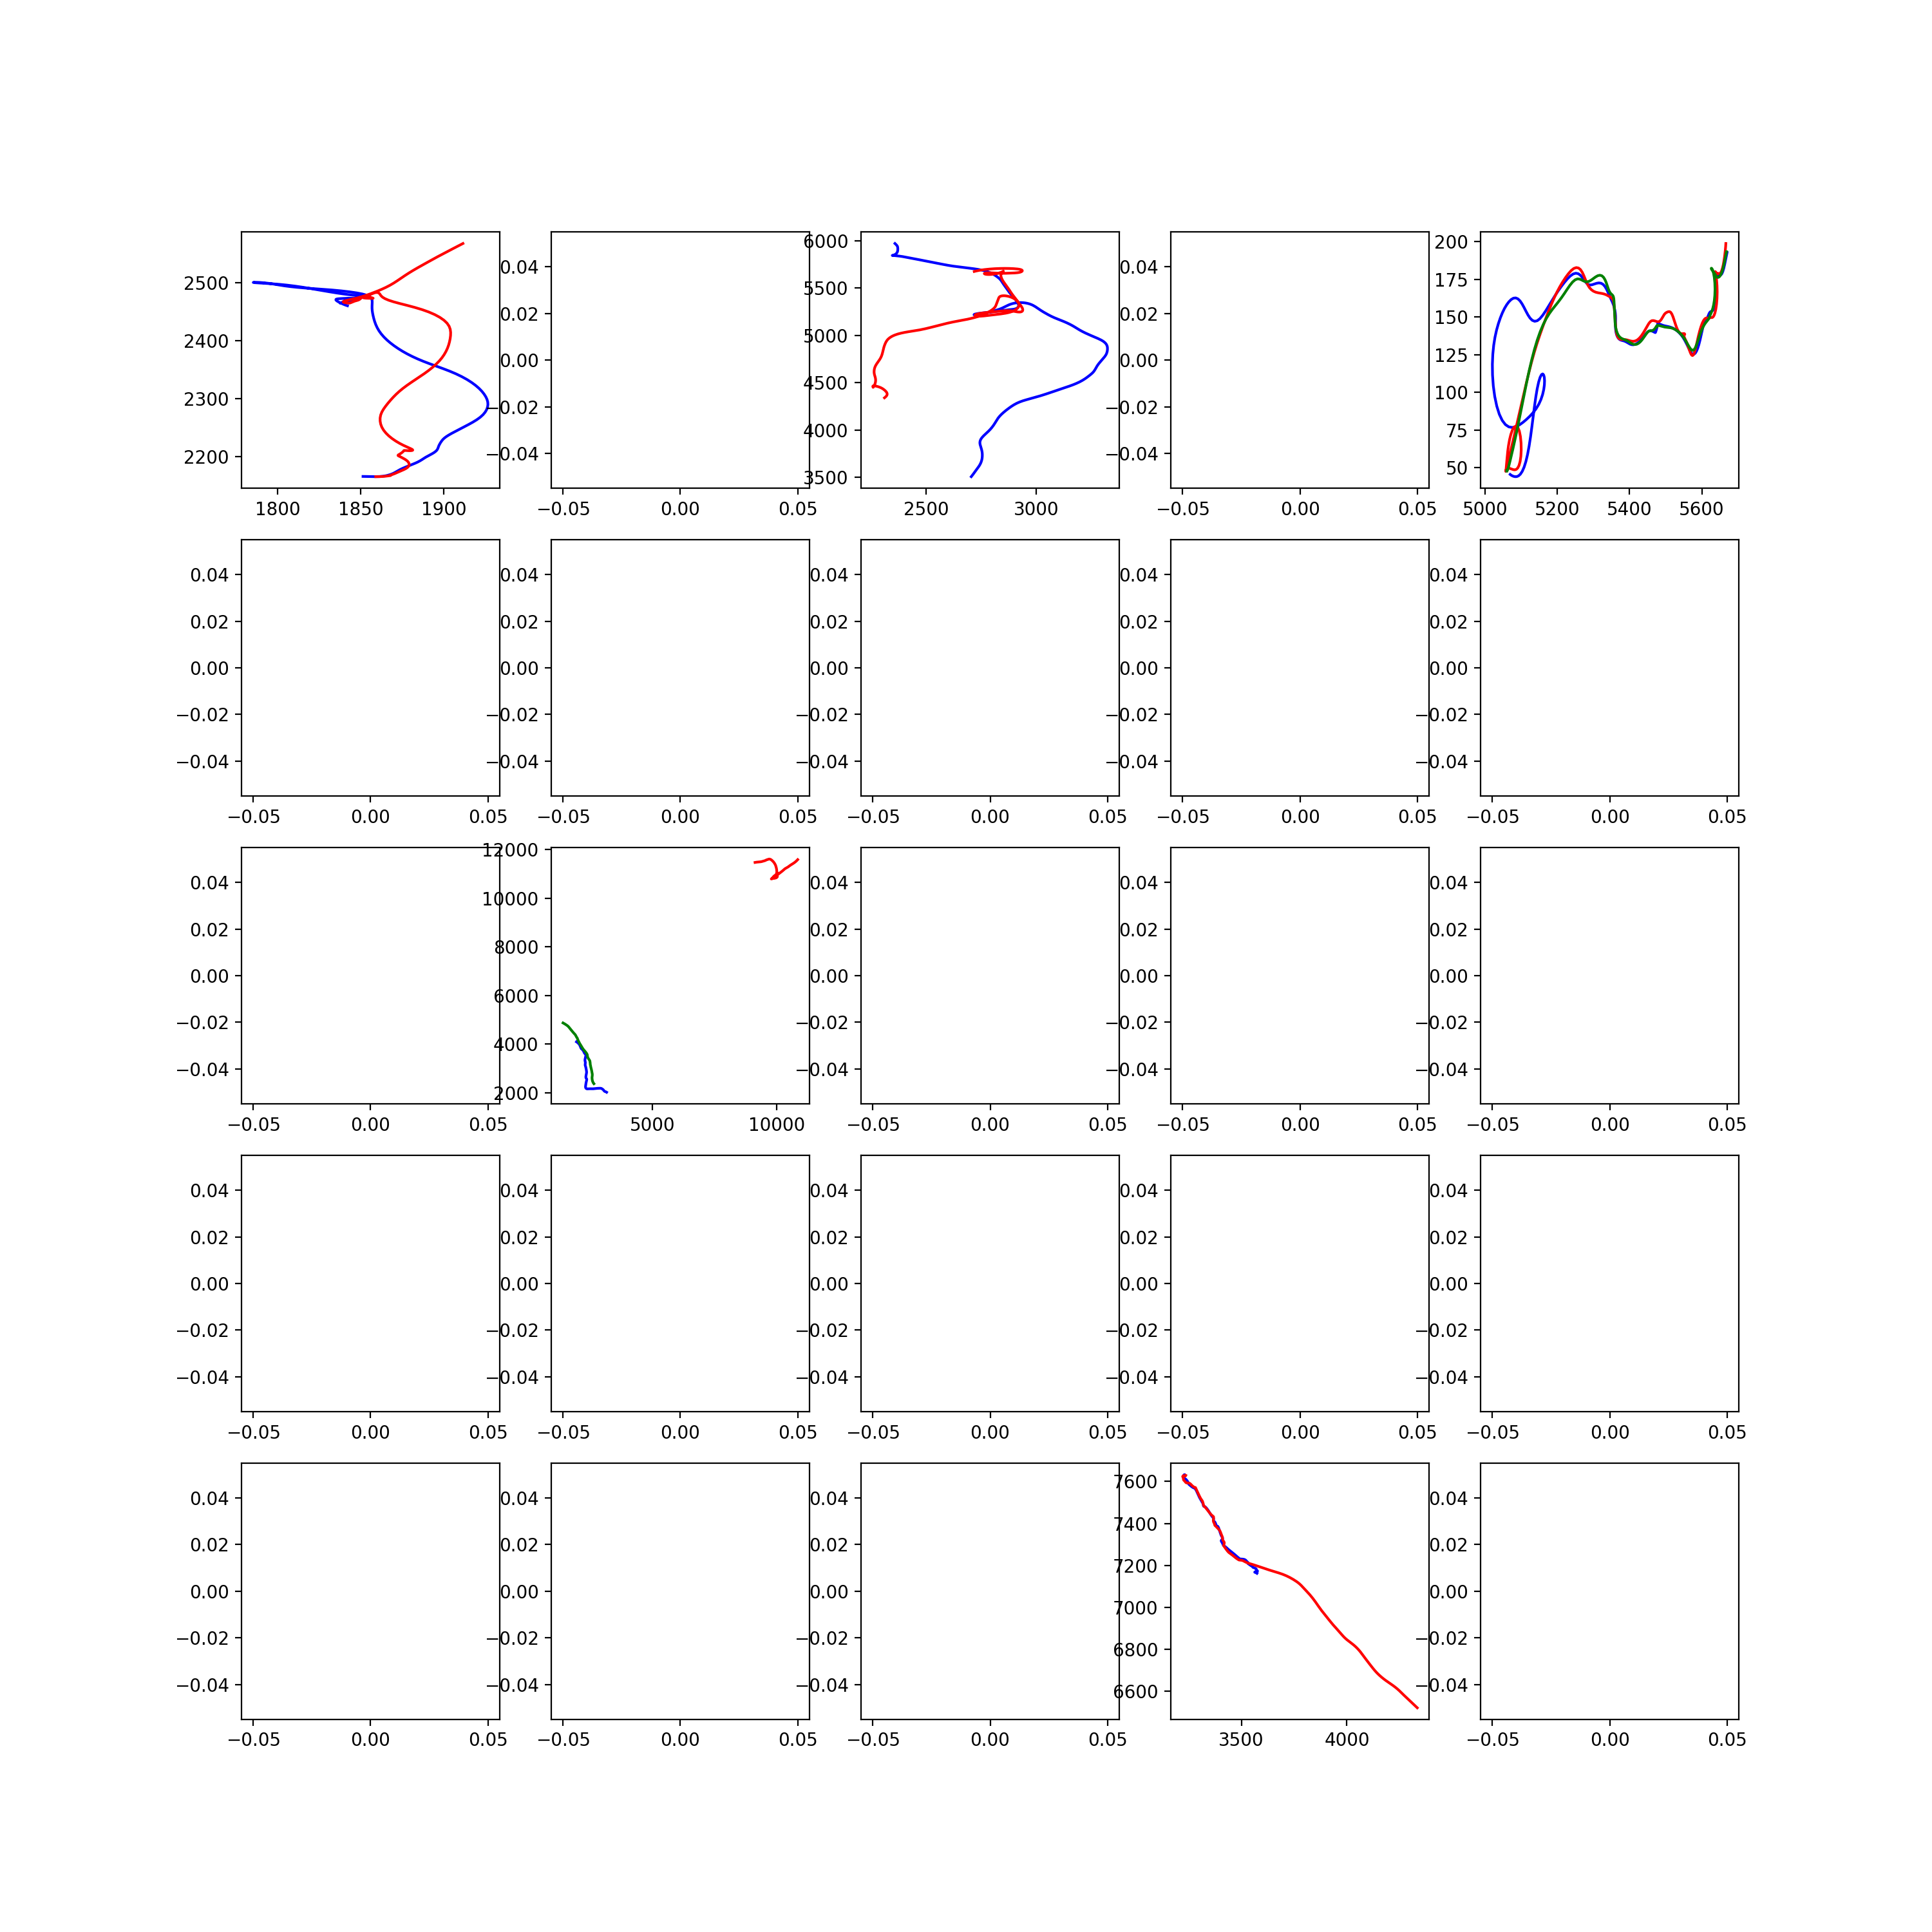

In [24]:
fig = plt.figure(figsize=(15.0, 15.0))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
for l in range(len(data)):
    plt.subplot(5,5,l+1)
    
    plt.plot(np.array(data[l][0][2]), np.array(data[l][0][3]), "b-")
    plt.plot(np.array(data[l][1][2]), np.array(data[l][1][3]), "r-")
    
    if len(data[l]) == 3:
        plt.plot(np.array(data[l][2][2]), np.array(data[l][2][3]), "g-")



<IPython.core.display.Javascript object>


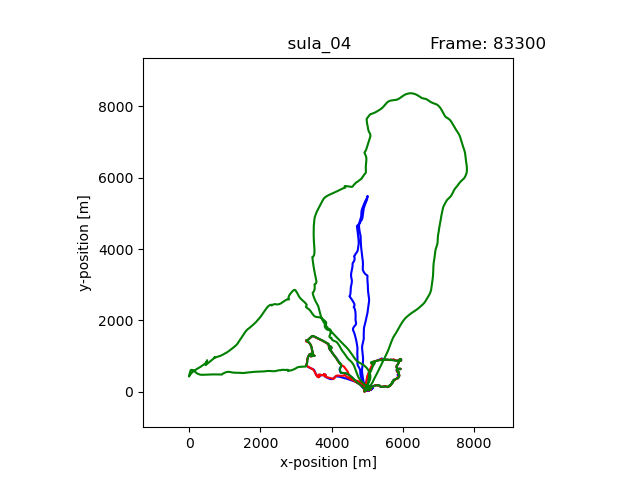

In [19]:
# 2D-plot

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')
number_movie = number + 1
margin = 0

def update_func(i):

    ax.clear()

    ax.plot(px1[:i], py1[:i], "b-")
    ax.plot(px2[:i], py2[:i], "r-")
    
    if number == 3 or number == 4 or number == 5:
        ax.plot(px3[:i], py3[:i], "g-")

    ax.set_xlim(x_mid - range_max - margin, x_mid + range_max + margin)
    ax.set_ylim(y_mid - range_max - margin, y_mid + range_max + margin)
    ax.set_xlabel("x-position [m]")
    ax.set_ylabel("y-position [m]")

    number_frame = i + 1
    ax.set_title('                                  sula_' +  "%02d" % number_movie + '               Frame: ' + "%03d" % number_frame )


# save movie
ani = animation.FuncAnimation(fig, update_func, frames=len(px1), interval=1, repeat=True)
# name = 'sula_' +  "%02d" % number_movie + '.mp4'
# filename = '../video/sula/' + name
# ani.save(filename, writer="ffmpeg")
plt.show()